# Task 3: CAR PRICE PREDICTION WITH MACHINE LEARNING
Objective: Based on the given Features we have to predict the prices of the cars.

Features given in the Data Set:
'Car_Name'
'Year'
'Selling_Price'
'Present_Price'
'Driven_kms'
'Fuel_Type'
'Selling_type'
'Transmission'
'Owner'




# Importing the Libraries

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Load the Data Set

In [164]:
car=pd.read_csv('/content/car data.csv')
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [107]:
car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [165]:
# Display number of samples on each class
print(car['Fuel_Type'].value_counts())
print(car['Transmission'].value_counts())
print(car['Selling_type'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
Dealer        195
Individual    106
Name: Selling_type, dtype: int64


In [166]:
# To display the  concise summary of the data set.
print("display the information about the data set ")
car.info()

# To display the descriptive stats about data
print("display the statistics of the data set ")
car.describe()

display the information about the data set 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
display the statistics of the data set 


,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [167]:
# checking the number of rows, columns
car.shape

(301, 9)

# Data Cleaning

In [168]:
# To display the number of missing values in each column
print("Number of missing values in each column:")
print(car.isnull().sum())

Number of missing values in each column:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [169]:
# To display duplicated values
car.duplicated().sum()
car[car.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


# Data Visualisation

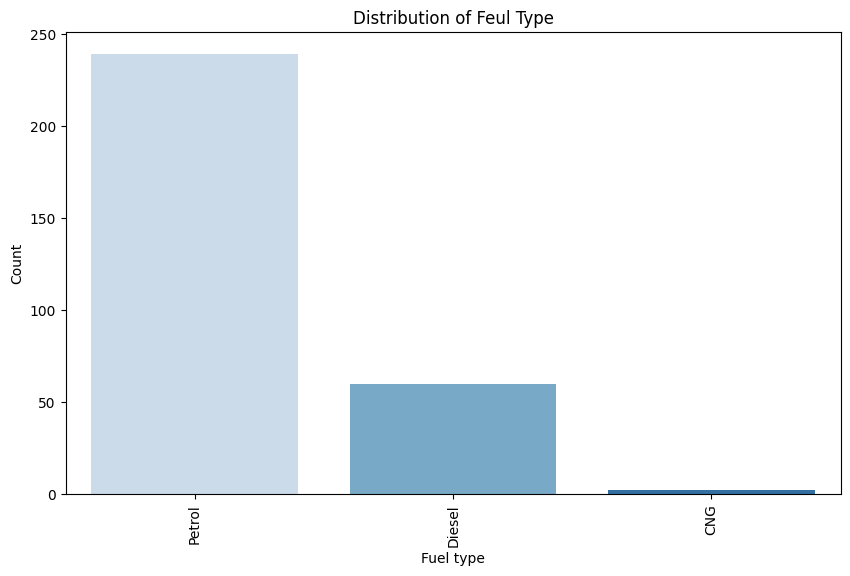

In [170]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Fuel_Type', data=car, palette='Blues')
plt.title('Distribution of Fuel Type')
plt.xlabel('Fuel type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

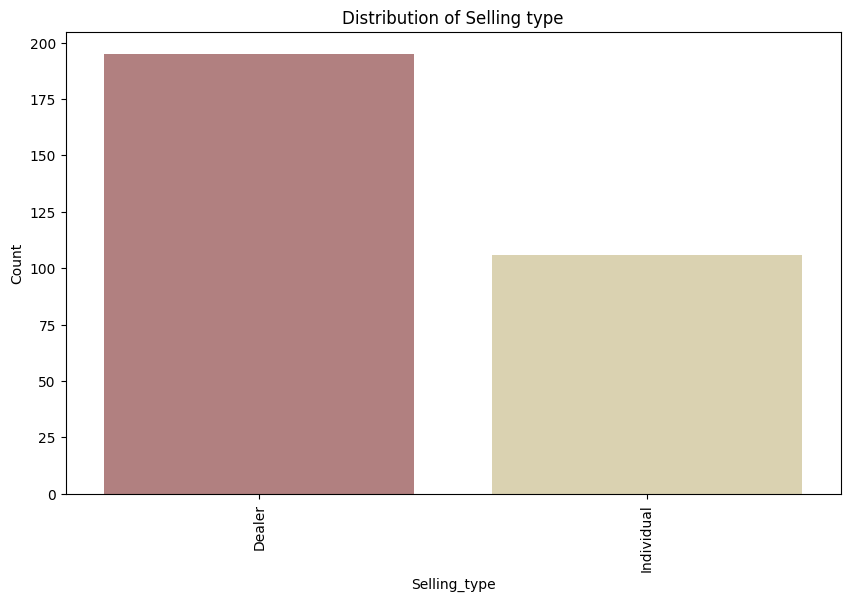

In [175]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Selling_type', data=car, palette='pink')
plt.title('Distribution of Selling type')
plt.xlabel('Selling_type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

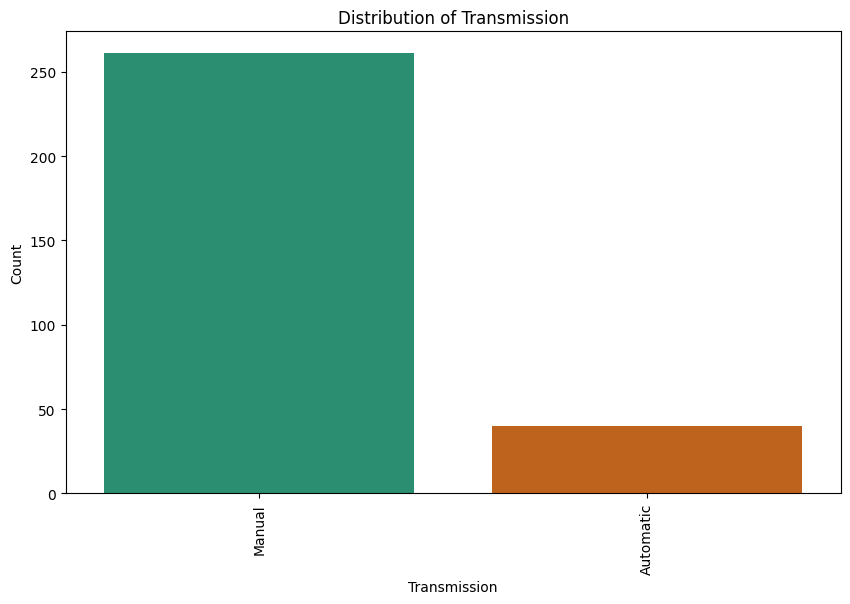

In [178]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Transmission', data=car, palette='Dark2')
plt.title('Distribution of Transmission')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

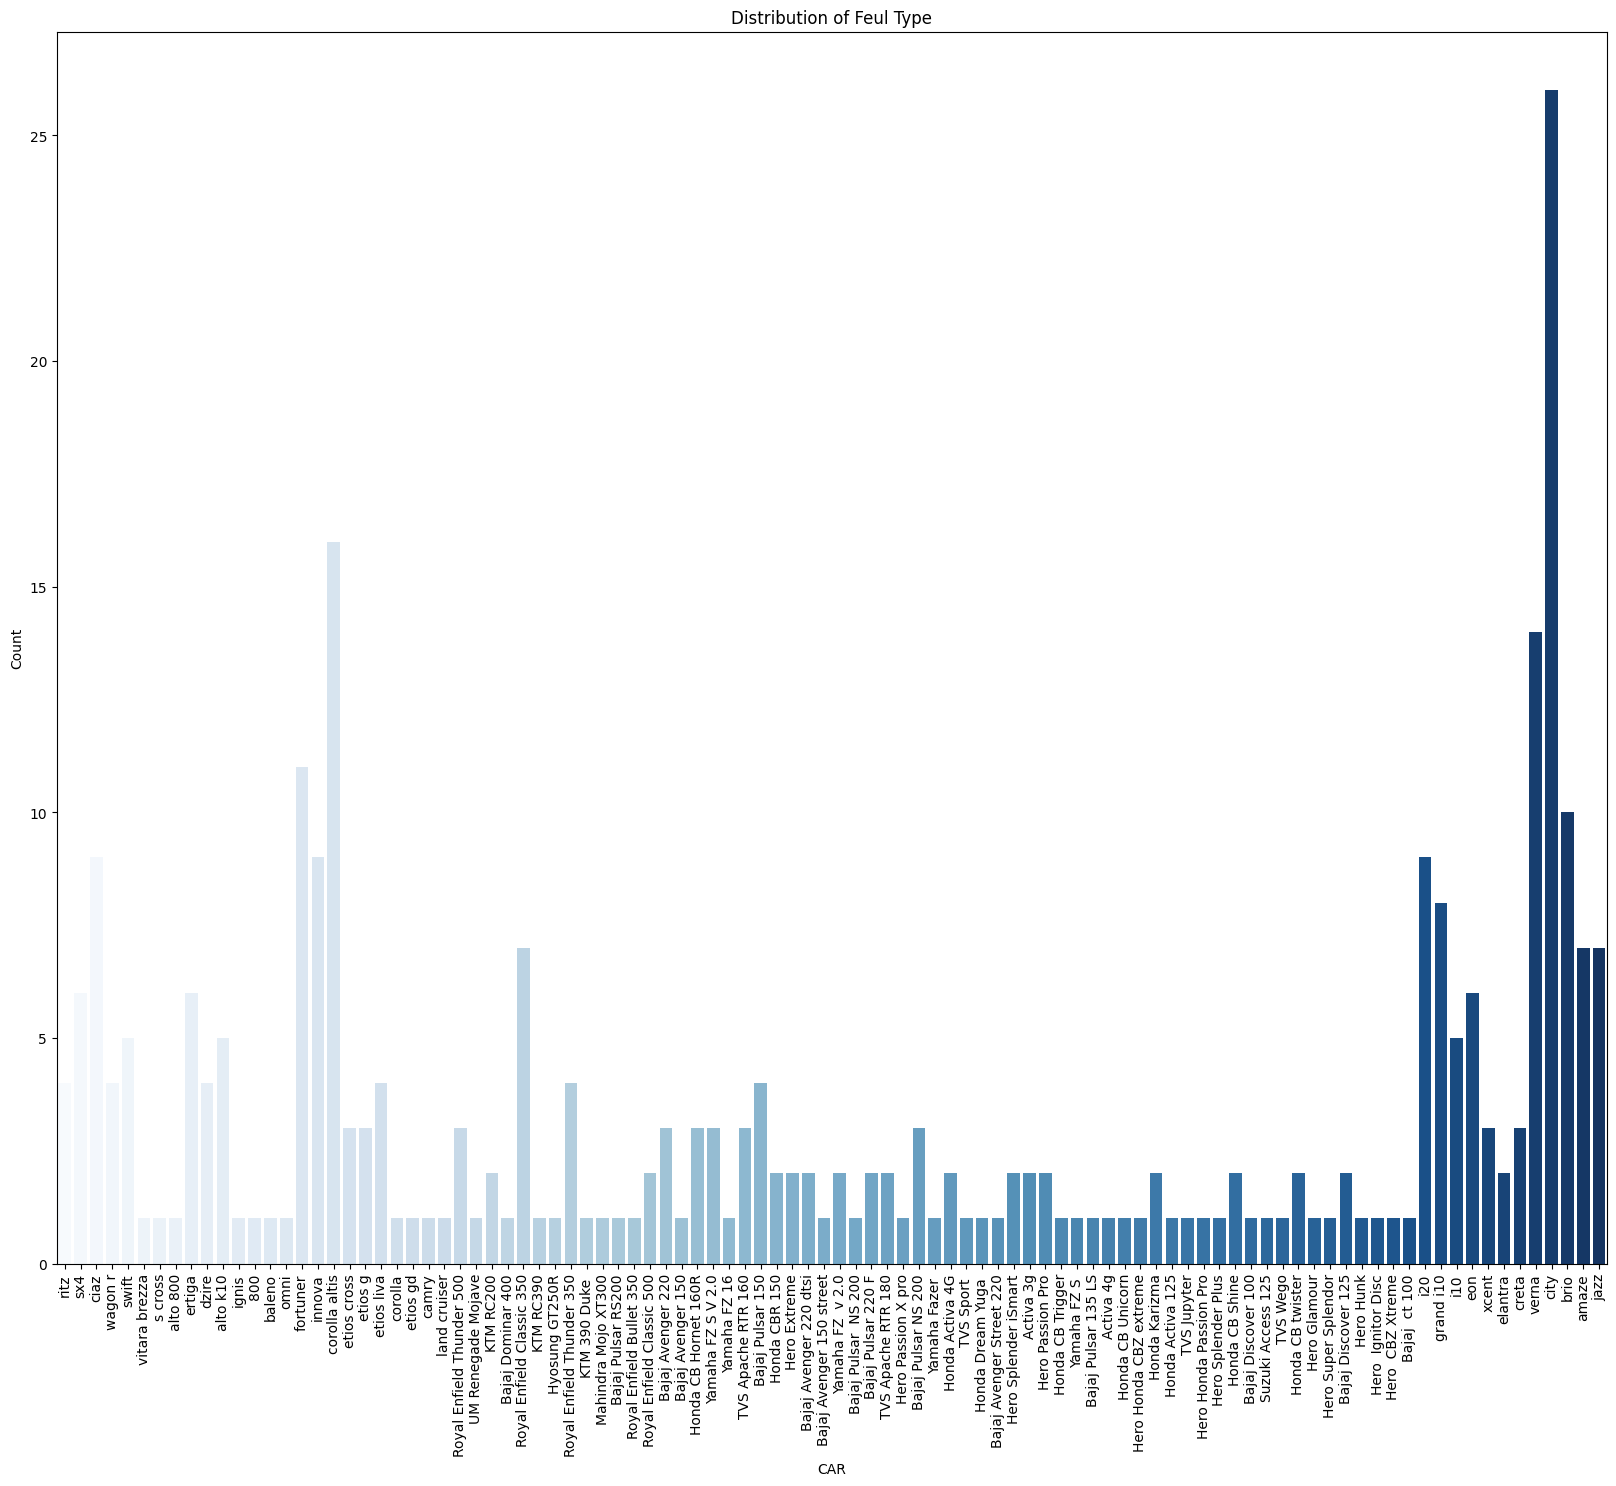

In [172]:
plt.figure(figsize=(20, 16))
sns.countplot(x='Car_Name', data=car, palette='Blues')
plt.title('Distribution of Feul Type')
plt.xlabel('CAR')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

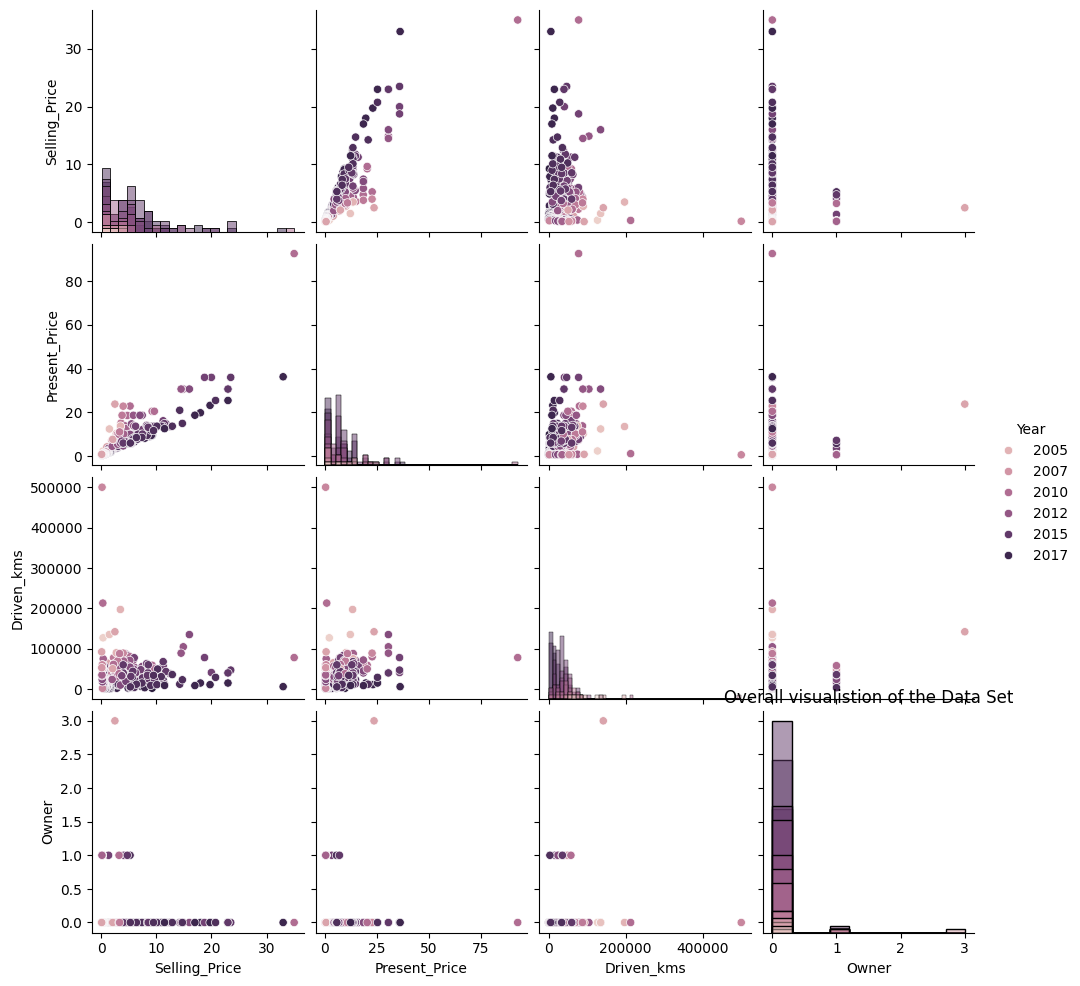

In [179]:
sns.pairplot(data = car, hue='Year', diag_kind="hist")
plt.title('Overall visualistion of the Data Set')
plt.show()

# Label Encoding
To convert categorical columns into numerical values so that they can be used in machine learning models which only take numerical data.

**Here we are converting 'Fuel_Type', 'Transmission', 'Selling_type' column data to Numeric data.**

In [180]:
#Before converting
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [181]:
#After converting
# Fuel_Type
print("Converting Fuel_Type")
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
car['Fuel_Type'] = le.fit_transform(car["Fuel_Type"])
car.head()

Converting Fuel_Type


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,2,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,2,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0


In [182]:
#After converting
# Transmission
print("Converting 'Transmission'")
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
car['Transmission'] = le.fit_transform(car["Transmission"])
car.head()

Converting 'Transmission'


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,Dealer,1,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,1,0
2,ciaz,2017,7.25,9.85,6900,2,Dealer,1,0
3,wagon r,2011,2.85,4.15,5200,2,Dealer,1,0
4,swift,2014,4.60,6.87,42450,1,Dealer,1,0


In [183]:
#After converting
# Selling_Type
print("Converting Selling_type")
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
car['Selling_type'] = le.fit_transform(car["Selling_type"])
car.head()

Converting Selling_type


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


# Machine Learning  




In [184]:
# Split the data into train set and test set
# train - 70%
# test - 30%
from sklearn.model_selection import train_test_split
X = car.drop(columns=['Car_Name','Selling_Price'])
Y = car['Selling_Price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [185]:
Y # SELLING PRICE

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [186]:
X # DROPPED CAR NAME COLUMN

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,1,0
297,2015,5.90,60000,2,0,1,0
298,2009,11.00,87934,2,0,1,0
299,2017,12.50,9000,1,0,1,0


# Linear Regression

In [126]:
# 3.Linear Regression Model
from sklearn.linear_model import LinearRegression
linear_car = LinearRegression()
linear_car.fit(x_train, y_train)

LinearRegression()

In [187]:
# To make Predictions
pd1 = linear_car.predict(x_test)

In [188]:
#To Evaluate Model's Performance/Accuracy
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Mean Absolute Error:', mean_absolute_error(y_test, pd1))
print('Mean Squared Error:', mean_squared_error(y_test, pd1))
score = np.sqrt(mean_squared_error(y_test, pd1))
print('Mean Root Squared Error:',score)

Mean Absolute Error: 1.0313548498557485
Mean Squared Error: 2.2630401907261772
Mean Root Squared Error: 1.504340450405485


In [189]:
from sklearn.metrics import r2_score
s = r2_score(y_test, pd1)
print("The accuracy of linear regression model is {}%".format(round(s, 2) *100))

The accuracy of linear regression model is 90.0%


# Random Forest Regressor

In [190]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)
pred2=rf.predict(x_test)

In [191]:
# To make Predictions
pd = rf.predict(x_test)

In [192]:
#To Evaluate Model's Performance/Accuracy
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Mean Absolute Error:', mean_absolute_error(y_test, pd1))
print('Mean Squared Error:', mean_squared_error(y_test, pd1))
score = np.sqrt(mean_squared_error(y_test, pd))
print('Mean Root Squared Error:',score)

Mean Absolute Error: 1.0313548498557485
Mean Squared Error: 2.2630401907261772
Mean Root Squared Error: 0.844666031863845


In [150]:
from sklearn.metrics import r2_score
s = r2_score(y_test, pd)
print("The accuracy of Random Forest Regressor is {}%".format(round(s, 2) *100))

The accuracy of Random Forest Regressor is 94.0%
